<a href="https://colab.research.google.com/github/acangi/lecture_notes_imprs_qdc_2024/blob/main/mini_book/docs/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perzeptron

### Importe

In [ ]:
# Install required packages
# !pip3 install pandas
# !pip3 install seaborn
# !pip3 install scikit-learn
# !pip3 install matminer
# !pip3 install numpy # Needed to reinstall numpy for matminer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from IPython.display import Image
from matplotlib import cm
from matplotlib import rcParams
from matplotlib.ticker import LinearLocator
from matplotlib import cbook
from matplotlib.colors import LightSource
from mpl_toolkits.mplot3d import axes3d

## Neuronale Netze

### Biologische Neuronen

#### Grundlegendes zum Neuron

Ein **Neuron**, auch Nervenzelle genannt, ist die grundlegende Funktionseinheit des Nervensystems. Neuronen sind spezialisierte Zellen, die Informationen durch elektrische und chemische Signale empfangen, verarbeiten und weiterleiten.

Eine Neuron setzt sich aus drei Hauptteilen zusammen:

* **Zellkörper (Soma)**:
Enthält den Zellkern und andere Organellen, die für die grundlegenden Zellfunktionen notwendig sind.

* **Dendriten**:
Baumartige Fortsätze, die Signale von anderen Nervenzellen empfangen und an den Zellkörper weiterleiten.

* **Axon**:
Ein langer, dünner Fortsatz, der elektrische Signale vom Zellkörper weg zu anderen Nervenzellen, Muskeln oder Drüsen leitet. Das Ende des Axons verzweigt sich in Axonendigungen, die Neurotransmitter freisetzen, um Signale zu übertragen.

![Neurons_cerebral_cortex](images/Neurons_cerebral_cortex.png)

#### Anatomie und Funktion eines Neurons

Die Funktion eines Neurons lässt sich in mehrere Schritte unterteilen:

* **Empfang von Signalen**: Dendriten empfangen chemische Signale von benachbarten Nervenzellen. Diese Signale führen zu Änderungen des Membranpotentials des Neurons.

* **Erzeugung eines Aktionspotentials**: Erreicht das Membranpotential einen bestimmten Schwellenwert, wird ein Aktionspotential ausgelöst. Dabei handelt es sich um eine schnelle Änderung des Membranpotentials, die sich entlang des Axons ausbreitet.

* **Weiterleitung des Aktionspotentials**: Das Aktionspotential wandert entlang des Axons zu den Axonterminalen. Dies geschieht durch eine Reihe von Depolarisationen und Repolarisationen der Zellmembran.

* **Signalübertragung**: Am Axonende führt das Aktionspotential zur Ausschüttung von Neurotransmittern in den synaptischen Spalt, den Raum zwischen dem Axonende der sendenden Nervenzelle und den Dendriten der empfangenden Nervenzelle. Die Neurotransmitter binden an Rezeptoren auf der Membran des empfangenden Neurons und können dort ein neues elektrisches Signal auslösen.

Diese Variabilität der Informationsübertragung spiegelt sich in den Gewichten künstlicher neuronaler Netze wider.

![Anatomy of a neuron](images/Neuron_anatomy.png)

### Künstliche Neuronen

#### Geschichte der Entwicklung künstlicher neuronaler Netze

* **Frühe Ideen und Inspirationen (1940er Jahre)**:

  * McCulloch und Pitts (1943): Sie entwickelten das erste mathematische Modell eines Neurons und legten damit den Grundstein für die Theorie neuronaler Netze. Ihr Modell zeigte, dass ein Neuron als einfacher binärer Schalter fungieren kann.
  
    ![McCulloch-Pitts neuron](images/McCulloch-Pitts-cell.png)

* **Perzeptron-Modell (1950er und 1960er Jahre)**:

  * Frank Rosenblatt (1958): Er erfand das Perzeptron, ein einfaches einstufiges neuronales Netz, das lineare Klassifikationsaufgaben lösen konnte. Das Perzeptron war lernfähig, indem es seine Gewichte durch einen einfachen Lernprozess anpasste.

  * Kritik am Perzeptron (1969): Marvin Minsky und Seymour Papert veröffentlichten das Buch "Perceptrons", in dem sie die Grenzen des Perzeptrons aufzeigten, insbesondere seine Unfähigkeit, nichtlineare Probleme wie das XOR-Problem zu lösen. Dies führte zu einem Rückgang des Interesses an neuronalen Netzen.

    ![Perceptron-xor-task](images/Perceptron-xor-task.png)

* **Wiederaufleben und Entwicklung des Multilayer-Perzeptrons (1980er Jahre):**

  * Backpropagation-Algorithmus (1986): David Rumelhart, Geoffrey Hinton und Ronald Williams stellten den Backpropagation-Algorithmus vor, mit dem die Gewichte in mehrschichtigen neuronalen Netzen effizient angepasst werden können. Dies löste das Problem der nichtlinearen Klassifikation und eröffnete neue Möglichkeiten für künstliche neuronale Netze.

## Perzeptron-Modell

### Struktur

Das einfache Perzeptron-Modell besteht aus einer Eingabe- und einer Ausgabeschicht.

In der Eingabeschicht wird die Eingabe (bzw. Input) $\vec{x}$ = $(x_1, x_2,\dots, x_n)$.

Die Ausgabeschicht besteht aus einem einzigen Neuron. Sie enthält die Netzeingabe (bzw. Netzinput) $z$ und den Ausgabewert (bzw. Output) $y$.

Dieses Netz kann zur binären Klassifikation verwendet werden, d.h. das Netz kann für eine Eingabe entscheiden, ob sie zu einer bestimmten Kategorie gehört. Die Klassifikation wird durch den Ausgabewert $y$ ausgedrückt.
<img src="attachment:images/Perceptron.png" width="500"/>

In [ ]:
Image(filename='images/Perceptron.png', width=200)

### Datenverarbeitung (Forward Propagation)

Im Folgenden soll mit Hilfe der Vektornotation die Funktionsweise des einfachen Perzeptron-Modells durchgespielt und der Weg vom Input $\vec{x}$ zum Output $y$ nachvollzogen werden. Diese Schritte werden auch Forward Propagation bezeichnet.

Der Input wird als Feature-Vektor $\vec{x}$ = $(x_1, x_2,\dots, x_n)$ dargestellt. Mit anderen Worten
\begin{align}
\vec{x} &=
\begin{pmatrix}
x_1\\ \vdots\\ x_n
\end{pmatrix} ,
\end{align}
wobei der Feature-Vektor die Länge $n$ hat und ein Feature $x_i \in \mathbb{R}$.

Die Parameter des Perzeptrons sind die Gewichte $w_i \in \mathbb{R}$. Sie werden ebenso als ein sogenannter Gewichtsvektor dargestellt:
\begin{align}
\vec{w} &=
\begin{pmatrix}
w_1\\ \vdots\\ w_n
\end{pmatrix} .
\end{align}


##### **Netzinput**
Im ersten Schritt wird aus dem Feature-Vektor $\vec{x}$ der Netzinput $z$ berechnent. Dieser ergibt sich aus der Summe der Werte der Inputneuronen multipliziert mit ihren jeweiligen Gewichten:

\begin{align}
z &= \sum_{i=1}^n w_i x_i = w_1 x_1 + \dots + w_n x_n . 
\end{align}

Dies können wir in kompakter Form in der Vektornotation als Matrizenmultiplikation ausdrücken:
\begin{align}
z &= \vec{w}^T \vec{x}\\
  &= (w_1, \dots, w_n) \begin{pmatrix} x_1\\ \vdots\\ x_n \end{pmatrix}\\
  &= w_1 x_1 + \dots + w_n x_n ,  
\end{align}
wobei $\vec{w}^T$ den transponierten Gewichtsvektor (also einen Zeilenvektor) bezeichnet.

##### **Aktivierung und Output**
Im zweiten und finalen Schritt berechnen wir die Aktivierung des Ausgabeneurons, was auch gleichzeitig dem Output des Perzeptron-Modells entspricht.

Dabei wird eine Aktivierungsfunktion $g$ auf den Netzinput angewendet:
\begin{align}
y &= g(z) .
\end{align}

### Lernen

Nachdem wir die Propagation von Daten durch das Perzeptron verstanden haben, wollen wir uns dem Lernprozess zuwenden. Unter Lernen eines Perzeptrons verstehen wir die schrittweise Anpassung der Gewichte $\vec{w}$ an die gewünschte Zielfunktion mit Hilfe von **Trainingsdaten**.

#### Trainingsdaten

Trainingsdaten sind z. B. eine Reihe von Daten mit einem Label (z. B. Bilder mit der kategorischen Zuordnung "Katze" und "Nicht-Katze").  Die Trainingsdaten können daher als Paare von Feature-Vektoren und Labels geschrieben werden:
\begin{align}
(\vec{x}^k, y^k) &~~~ k \in \{1, \dots, N\} ,
\end{align}
wobei wir hier von $N$ Trainingsdaten ausgehen.

Bei einem neuronalen Netz müssen wir zwischen dem berechneten Output des aktuellen Netzes $\bar{y}^k \in \{0,1\}$ und dem korrekten Output eines Trainingsbeispiels $y^k \in \{0,1\}$ unterscheiden.

#### Lernschritt

Lernen bedeutet, dass wir für jedes Trainingsbeispiel den Output $\bar{y}$ berechnen und dann die Gewichte anpassen. Dies wird als **Lernschritt** bezeichnet.

Wir können also für die Paare von Feature-Vektoren und Labels $(\vec{x}^k, y^k)$ den Gewichtsvektor $\vec{w}$ in jedem Lernschritt anpassen, indem wir eine Änderung aller Gewichte zum aktuellen Wert addieren:
\begin{align}
w_i &:= w_i + \Delta w_i .
\end{align}

Wir werden im nächsten Abschnitt eine konkrete Regel für die Anpassung der Gewichte definieren. Zuvor wollen wir uns jedoch mit den Eigenschaften der Wichtungsaktualisierung befassen:

* Wenn der der berechnete Output $\bar{y}$ größer ist als der Referenzwert $y$, soll die Wichtungsaktualisierung negativ sein, das Gewicht dieses Neurons soll also abgeschwächt werden.
* Wenn der der berechnete Output $\bar{y}$ kleiner ist als der Referenzwert $y$, soll die Wichtungsaktualisierung positiv sein, d.h. das Gewicht wird verstärkt.
* Wenn der berechnete Output $\bar{y}$ und der Referenzwert $y$ gleich sind, soll keine Wichtungsaktualisierung erfolgen.

### Gradientenabstieg

Im Folgenden soll eine Lernregel hergeleitet werden, die zur Aktualisierung der Gewichte eines Perzeptrons verwendet werden kann.

#### Fehlerfunktion
Um eine geeignete Lernregel abzuleiten, müssen wir zunächst den Begriff der Fehlerfunktion $J$ definieren. Sie ist definiert als
\begin{align}
J(w) &= \frac{1}{2N} \sum_{k=1}^N \left[ y^k - \bar{y}^k \right]^2 .
\end{align}

Die Fehlerfunktion ist also als Mittelwert der quadrierten Fehler definiert, was sehr gebräuchlich ist.

Wie kann man sich die Fehlerfunktion vorstellen? Sie ist eine mehrdimensionale Funktion der Wichtungen bzw. des Gewichtsvektors $\vec{w}$. Eine intuitive Vorstellung erhält man, wenn man sich die Abbildung ansieht, in der die Fehlerfunktion als Funktion von zwei repräsentativen Gewichten ($w_0$ und $w_1$) dargestellt ist.

<img src="images/landscape_0.png" alt=" Landscape 0" width="400"/>

Wir sehen also, dass die Fehlerfunktion hier eine 2-dimensionale (und im Allgemeinen eine mehrdimensionale) Parameterlandschaft aufspannt.


#### Lernregel: Minimum der Fehlerlandschaft
Wir können nun anhand der Fehlerfunktion eine Lernregel herleiten, indem wir uns als Ziel setzen den Wert der Fehlerfunktion zu minimieren. Dies bedeutet, dass wir nach Tälern in der Parameterlandschaft suchen.

<img src="images/landscape_2.png" alt="Landscape 2" width="400"/>

### Wichtungsaktualisierung

Aus der Fehlerfunktion können wir nun eine Lernregel ableiten, mit dem Ziel, den Wert der Fehlerfunktion zu minimieren. Das bedeutet, dass wir nach Tälern in der Parameterlandschaft suchen.

Mit diesem Ziel können wir die Wichtungsaktualisierung $w := w + \Delta w$ ableiten. Dazu nutzen wir den Gradienten der Fehlerlandschaft, der uns über den größten Anstieg der Fehlerlandschaft informiert. Wir nehmen also den negativen Gradienten und erhalten damit unsere Lernregel:

\begin{align}
\Delta \vec{w} &= -\alpha\, \nabla J(w)\\
         &= -\alpha\, \begin{pmatrix} \frac{\partial J(w)}{\partial w_1}
                            \vdots \\
                            \frac{\partial J(w)}{\partial w_n}
            \end{pmatrix} ,
\end{align}

wobei wir hier auch die Lernrate $\alpha \in [0,1]$ eingeführt haben.
Wie in der Abbildung zu sehen ist, führt eine Aktualisierung der Gewichte in der Richtung des negativen Gradienten dazu, dass die Richtung Minimun der Fehlerlandschaft laufen.

Für die Lernregel benötigen wir nun die partiellen Ableitungen der Fehlerfunktion nach den Gewichten $w_1, \dots, w_n$, die wir jetzt ausrechnen.

Dazu beginnen wir mit der Definition der Fehlerfunktion und formen sie um, bis wir sie nach den einzelnen Gewichten ableiten können:

\begin{align}
J(w) &= \frac{1}{2N} \sum_{k=1}^N \left[ y^k - \bar{y}^k \right]^2 .
\end{align}

Um die Herleitung zu vereinfachen, wählen wir als Aktivierungsfunktion die identische Abbildung
\begin{align}
g(z) &= z .
\end{align}

Wir setzen sie in die Definition der Fehlerfunktion ein und erhalten
\begin{align}
J(w) &= \frac{1}{2N} \sum_{k=1}^N \left[ y^k - g(z^k) \right]^2 .
\end{align}

Wir werten nun die Aktivierungsfunktion aus, damit vereinfacht sich der Ausdruck zu:
\begin{align}
J(w) &= \frac{1}{2N} \sum_{k=1}^N \left( y^k - z^k \right)^2 .
\end{align}

Nun setzen wir noch den Ausdruck für den Netz-Input ein:
\begin{align}
J(w) &= \frac{1}{2N} \sum_{k=1}^N \left( y^k - \vec{w}^T \vec{x}^k \right)^2 .
\end{align}

Nun können wir die Ableitung nach dem Gewicht $w_i$ explizit berechnen:
\begin{align}
\frac{\partial J}{\partial w_i}
&= \frac{\partial}{\partial w_i} \frac{1}{2N} \sum_{k=1}^N \left( y^k - \vec{w}^T \vec{x}^k \right)^2 \\
&= \frac{1}{2N} \sum_{k=1}^N \frac{\partial}{\partial w_i} \left( y^k - \vec{w}^T \vec{x}^k \right)^2 \\
&= \frac{1}{2N} \sum_{k=1}^N  2 \left( y^k - \vec{w}^T \vec{x}^k \right) \frac{\partial}{\partial w_i} \left(y^k - \vec{w}^T \vec{x}^k \right) \\
&= \frac{1}{N} \sum_{k=1}^N \left( y^k - \vec{w}^T \vec{x}^k \right) \frac{\partial}{\partial w_i} \left[-(w_1, \dots, w_i, \dots, w_n) \begin{pmatrix} x^k_1\\ \vdots\\  x^k_i\\ \vdots\\ x^k_n \end{pmatrix} \right] \\
&= -\frac{1}{N} \sum_{k=1}^N \left( y^k - \vec{w}^T \vec{x}^k \right) \frac{\partial}{\partial w_i} \left[ (w_1 x^k_1 + \dots + w_i x^k_i + \dots + w_n x^k_n) \right] \\
&= -\frac{1}{N} \sum_{k=1}^N \left( y^k - \vec{w}^T \vec{x}^k \right) x^k_i
\end{align}

Am Ende setzen wir wieder die Definition der Aktivierungsfunktion ein und erhalten:
\begin{align}
\frac{\partial J}{\partial w_i}
&=-\frac{1}{N} \sum_{k=1}^N \left[ y^k - g(z^k) \right] x^k_i
\end{align}


Damit erhalten wir als Lernregel für ein spezifisches Gewicht:
\begin{align}
\Delta w_i
&=-\alpha \frac{\partial J(w)}{\partial w_i}\\
&=\frac{\alpha}{N} \sum_{k=1}^N \left[ y^k - g(z^k) \right] x^k_i
\end{align}

Da der Output des Perzeptron $\bar{y}^k=g(z^k)$ ist, erhalten wir somit:
\begin{align}
\Delta w_i
&=\frac{\alpha}{N} \sum_{k=1}^N \left( y^k - \bar{y}^k \right) x^k_i
\end{align}

Damit haben wir unsere Lernregel mit Hilfe des Gradientenabstiegs abgeleitet. Wie wir sehen, müssen wir zuerst die Summe über alle Trainingsdaten ($N$ mal) verarbeiten, um unsere Wichtungsaktualisierung für einen Lernschritt zu berechnen.   

## Anwendungsbeispiel: Binäre Klassifikation mit dem Perzpetron-Modell

### Lernalgorithmus

Mit Hilfe der hergeleiteten Lernregel können wir nun einen Lernalgorithmus formulieren.

1.   Initialisiere alle Gewichte $\vec{w} = (w_0, ..., w_n)$.
2.   Für jede Epoche:
     * Setze $\Delta w_i = 0$
     * Für jeden Satz an Trainingsdaten ($x^k, y^k$), $k=1, \dots, N$:
       * Berechne Output $y^k$.
       * Berechne Wichtungsaktualisierung: $\Delta w_i^k = \Delta w_i^k + (y^k-\bar{y}^k)x_i^k$.
     * Berechne den Mittelwert aller Wichtungsaktualisierung über die Trainingsdaten: $\Delta w_i = \frac{\alpha}{N}\sum_{k=1}^N \Delta w_i^k$
     * Aktualisiere alle Gewichte $w_i = w_i + \Delta w_i$




### Implementierung des Perzeptrons

#### Perzeptron-Klasse

Wir definieren zuerst eine Klasse `Perceptron`:

In [2]:
class Perceptron():
    
    # Konstruktor mit Defaultwerten
    def __init__(self, alpha=0.01):
        self.alpha = alpha
    
    # Training mit x (Matrix von Featurevektoren) und y (Labels)
    def train(self, x, y, epochs):
        rnd = np.random.RandomState(42)
        n_samples = x.shape[0]
        print(f"Train on {n_samples} samples")
        
        # Gewichte: 1 + dim(x) für den Bias
        self.w = rnd.normal(loc=0, scale=0.01, size=1 + x.shape[1]) 
    
        # Speicher für Kosten (loss function) pro Epoche
        self.loss = [] 
        
        # Speicher für Vorhersage pro Epoche
        self.prediction = [] 

        # Speicher für binäre Genauigkeit pro Epoche
        self.accuracy = [] 

        # Epochen durchlaufen
        for i in range(epochs):
            z = self.net_input(x) # Netzinput für alle Trainingsdaten
            y_hat = self.activation(z) # Aktivierung für alle Trainingsdaten
            diff = y - y_hat # Fehlervektor für alle Trainingsdaten
            
            # Update der Gewichte
            self.w[1:] += self.alpha * x.T.dot(diff)
            
            # Update des Gewichts für das Bias-Neuron
            self.w[0] += self.alpha * diff.sum()
            
            # Kosten für diese Epoche (SSE) berechnen und in Liste speichern
            l = (diff**2).sum() / 2.0 
            self.loss.append(l)
            print(f"Epoch {i+1}/{epochs} - loss: {l:.4f}")

            # Vorhersage für diese Epoche in Liste speichern
            prediction = self.predict(x)
            self.prediction.append(prediction)

            # Genauigkeit für diese Epoche in Liste speichern
            accuracy = self.measure_accuracy(y,self.predict(x))
            self.accuracy.append(accuracy)
        
        return self
    
    # Aktivierungsfunktion: Identität
    def activation(self, z):
        return z
    
    def net_input(self, x):
        return np.dot(x, self.w[1:]) + self.w[0] 
    
    def predict(self, x):
        return np.where(self.net_input(x) >= 0, 1, 0)

    def measure_accuracy(self, y_true, y_pred):
        N = y_true.shape[0]
        accuracy = (y_true == y_pred).sum() / N
        return accuracy

#### Lernen

Das Lernen bzw. Training des Perzeptrons findet in der Funktion `train`, insbesondere in der Schleife über die Epochen (Zeilen 20 - 35) statt. 

```
for i in range(epochs):
            z = self.net_input(x) # Netzinput für alle Trainingsdaten
            y_hat = self.activation(z) # Aktivierung für alle Trainingsdaten
            diff = y - y_hat # Fehlervektor für alle Trainingsdaten
            
            # Update der Gewichte
            self.w[1:] += self.alpha * x.T.dot(diff)
            
            # Update des Gewichts für das Bias-Neuron
            self.w[0] += self.alpha * diff.sum()
```

#### Batch-Verarbeitung der Trainingsdaten

Wir haben das Perzeptron so implementiert, dass die Matrix $x$ alle Merkmalsvektoren enthält. Dadurch erreichen wir, dass alle Trainingsdaten durchlaufen werden, bevor die Wichtung aktualisiert wird. 
Die Merkmalsvektoren werden übereinander gestapelt und bilden so eine $N \times 3$ Inputmatrix. Dabei ist zu beachten, dass die erste Spalte der Matrix das Bias-Neuron darstellt, also nur Einsen enthält. Durch Matrixmultiplikation der $N \times 3$ Inputmatrix mit dem $3 \times 1$ Gewichtungsvektor erhalten wir einen $N \times 1$ Outputvektor, der alle Ausgaben für alle Trainingsbeispiele enthält.

Dabei wird der Netzinput in der Funktion `net_input` berechnet:
```
def net_input(self, x):
        return np.dot(x, self.w[1:]) + self.w[0] 
```

Um uns ein besseres Verständnis zu verschaffen, stellen wir die Operationen bildlich dar.

<img src="images/Training_01.png" alt="Training_01" width="600"/>

Die Inputvektoren sind eigentlich Zeilenvektoren und übereinander gestapelt.

Dieses Bild ist jedoch nicht ganz korrekt. Tatsächlich wird das Bias-Neuron in der Implementierung anders behandelt, wie die folgende Abbildung zeigt:

<img src="images/Training_02.png" alt="Training_02" width="600"/>

Dies entspricht in der Implementierung der folgenden Zeile:
```
np.dot(x, self.w[1:]) + self.w[0]
```

#### Wichtungsaktualisierung

Die Wichtungsaktualisierung
$$
\begin{align}
\vec{w} &= \vec{w} + \Delta\vec{w}\\
\Delta w_i &= -\alpha\frac{\partial J}{\partial w_i} = \frac{\alpha}{N}\sum_{k=1}^N \left[y^k - g(z^k) \right] x_i^k
\end{align}
$$
ist auf folgende Weise implementiert.

<img src="images/Training_03.png" alt="Training_03" width="800"/>

### Datensatz

Zur Veranschaulichung des Perzeptron-Modells können die Beispieldatensätze der `scikit-learn`-Bibliothek verwendet werden.

In [3]:
from sklearn import datasets
data_wine = datasets.load_wine()

Wir importieren den `Wein`-Datensatz. Bei den Daten handelt es sich um die Ergebnisse einer chemischen Analyse von Weinen, die in derselben Region in Italien von drei verschiedenen Weinbauern angebaut wurden. Es wurden dreizehn verschiedene Messungen für verschiedene Inhaltsstoffe in den drei Weintypen durchgeführt. Wir sehen uns zunächst die Kategorien des `Dictionaries` an.

In [4]:
data_wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
np.shape(data_wine.data)

(178, 13)

Die Output-Daten werden in der Kategorie `target` gespeichert. Die Eingabedaten befinden sich in der Kategorie `data`. Als Input stehen folgende Merkmale (*features*) zur Verfügung:

In [6]:
data_wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In unserem Anwendungsfall wollen wir zwei Merkmale verwenden, um ein binäres Klassifikationsproblem mit Hilfe des Perzeptron-Modells zu lösen. Daher analysieren wir den Datensatz, indem wir die drei Kategorien in Abhängigkeit von verschiedenen Merkmalen darstellen. Es zeigt sich, dass die beiden Merkmale "Alkohol" und "Flavonoide" zu einem linear separierbaren Datensatz zwischen den Kategorien "0" (dunkelblau) und "2" (gelb) führen. 

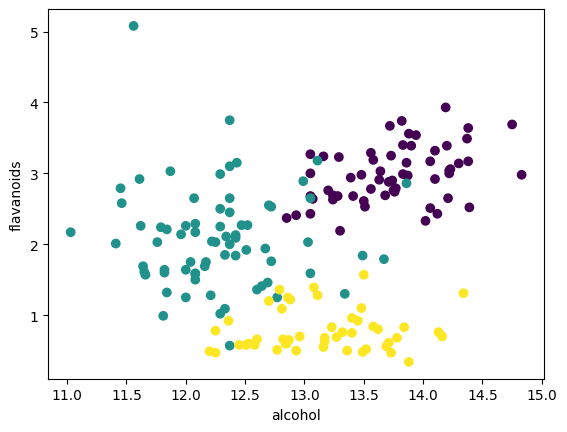

In [7]:
plt.scatter(data_wine.data.T[0], data_wine.data.T[6], c=data_wine.target)
plt.xlabel(data_wine.feature_names[0])
plt.ylabel(data_wine.feature_names[6])
plt.show()

Wir bereiten nun unseren Datensatz für das Training des Perzeptron-Modells vor. Wir beginnen mit den Output-Daten. 

In [8]:
y = np.concatenate((data_wine.target[:59], data_wine.target[130:]))

In [9]:
# Change values to 0 and 1.
y = np.where(y == 2, 1, 0)

In ähnlicher Weise bereiten wir die Input-Daten auf.

In [10]:
input_features = data_wine.data.T

In [11]:
input_features = input_features[[0,6]]

In [12]:
x = np.concatenate((input_features.T[:59], input_features.T[130:]))

Am Ende überprüfen wir noch einmal, ob die Daten richtig aufbereitet wurden.

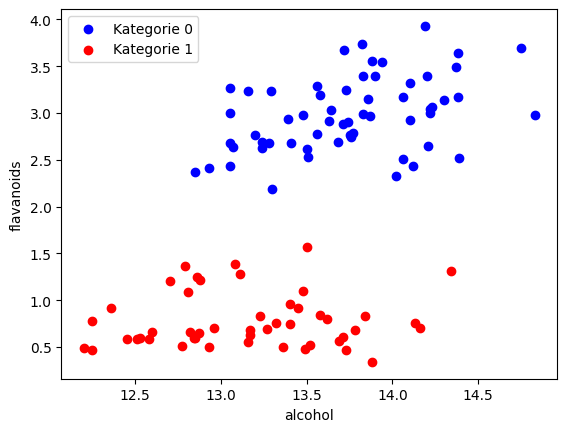

In [13]:
plt.scatter(x.T[0][:59], x.T[1][:59], c='blue', label='Kategorie 0')
plt.scatter(x.T[0][59:], x.T[1][59:], c='red', label='Kategorie 1')
plt.xlabel(data_wine.feature_names[0])
plt.ylabel(data_wine.feature_names[6])
plt.legend(loc='upper left')
plt.show()

#### 3.3.4 Trainingsbeispiele

In [14]:
model1 = Perceptron(alpha=0.01)
model1.train(x, y, epochs=20)

Train on 107 samples
Epoch 1/20 - loss: 24.3943
Epoch 2/20 - loss: 396537.5104
Epoch 3/20 - loss: 15739893894.5611
Epoch 4/20 - loss: 624772406547911.8750
Epoch 5/20 - loss: 24799440366778023936.0000
Epoch 6/20 - loss: 984378048805868910149632.0000
Epoch 7/20 - loss: 39073468136359529074523111424.0000
Epoch 8/20 - loss: 1550965011923171428327371374067712.0000
Epoch 9/20 - loss: 61563321172696989024691524890682982400.0000
Epoch 10/20 - loss: 2443667319814680598393474114216432374906880.0000
Epoch 11/20 - loss: 96997852880273144495441305511433688178281676800.0000
Epoch 12/20 - loss: 3850189993986835854113973437881567711536929373683712.0000
Epoch 13/20 - loss: 152827743600612857021530584983646458440924546131522748416.0000
Epoch 14/20 - loss: 6066277053997903087624143544143147905396724767720546966175744.0000
Epoch 15/20 - loss: 240792126016273385080864897397437355736215755947713053039949512704.0000
Epoch 16/20 - loss: 9557896455326798771058602702427534774549539692627699827134881146601472.00

In [15]:
model2 = Perceptron(alpha=0.0001)
model2.train(x, y, epochs=20)

Train on 107 samples
Epoch 1/20 - loss: 24.3943
Epoch 2/20 - loss: 24.1080
Epoch 3/20 - loss: 23.8304
Epoch 4/20 - loss: 23.5612
Epoch 5/20 - loss: 23.3002
Epoch 6/20 - loss: 23.0473
Epoch 7/20 - loss: 22.8023
Epoch 8/20 - loss: 22.5648
Epoch 9/20 - loss: 22.3349
Epoch 10/20 - loss: 22.1122
Epoch 11/20 - loss: 21.8966
Epoch 12/20 - loss: 21.6880
Epoch 13/20 - loss: 21.4861
Epoch 14/20 - loss: 21.2908
Epoch 15/20 - loss: 21.1019
Epoch 16/20 - loss: 20.9193
Epoch 17/20 - loss: 20.7428
Epoch 18/20 - loss: 20.5723
Epoch 19/20 - loss: 20.4077
Epoch 20/20 - loss: 20.2487


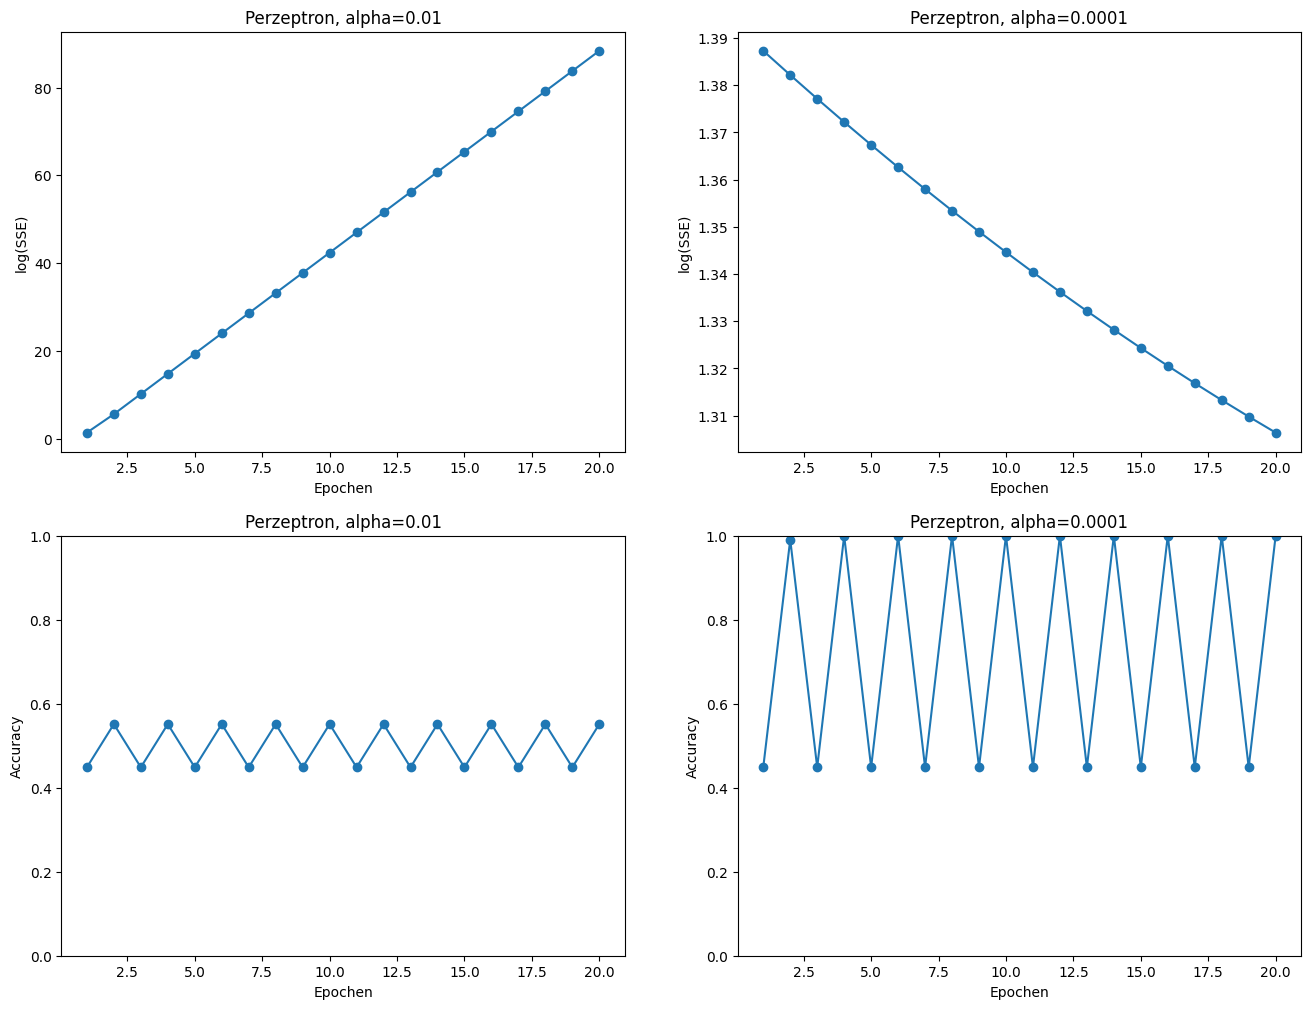

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,12))

ax[0][0].plot(range(1, len(model1.loss)+1), np.log10(model1.loss), marker='o')
ax[0][0].set_xlabel('Epochen')
ax[0][0].set_ylabel('log(SSE)')
ax[0][0].set_title('Perzeptron, alpha=0.01')

ax[0][1].plot(range(1, len(model2.loss)+1), np.log10(model2.loss), marker='o')
ax[0][1].set_xlabel('Epochen')
ax[0][1].set_ylabel('log(SSE)')
ax[0][1].set_title('Perzeptron, alpha=0.0001')

ax[1][0].plot(range(1, len(model1.loss)+1), model1.accuracy, marker='o')
ax[1][0].set_ylim(0, 1)
ax[1][0].set_xlabel('Epochen')
ax[1][0].set_ylabel('Accuracy')
ax[1][0].set_title('Perzeptron, alpha=0.01')

ax[1][1].plot(range(1, len(model2.loss)+1), model2.accuracy, marker='o')
ax[1][1].set_ylim(0, 1)
ax[1][1].set_xlabel('Epochen')
ax[1][1].set_ylabel('Accuracy')
ax[1][1].set_title('Perzeptron, alpha=0.0001')

plt.show()

### 3.4 Trainingsstrategien

#### 3.4.1 Standardisieren

Standardisieren der beiden Inputs:

In [17]:
x_st = np.copy(x)
x_st[:, 0] = (x[:,0] - x[:,0].mean()) / x[:,0].std()
x_st[:, 1] = (x[:,1] - x[:,1].mean()) / x[:,1].std()

In [18]:
model3 = Perceptron(alpha=0.01)
model3.train(x_st, y, epochs=20)

Train on 107 samples
Epoch 1/20 - loss: 24.0550
Epoch 2/20 - loss: 6.3107
Epoch 3/20 - loss: 3.3507
Epoch 4/20 - loss: 2.1435
Epoch 5/20 - loss: 1.6292
Epoch 6/20 - loss: 1.4059
Epoch 7/20 - loss: 1.3078
Epoch 8/20 - loss: 1.2643
Epoch 9/20 - loss: 1.2449
Epoch 10/20 - loss: 1.2362
Epoch 11/20 - loss: 1.2323
Epoch 12/20 - loss: 1.2306
Epoch 13/20 - loss: 1.2298
Epoch 14/20 - loss: 1.2294
Epoch 15/20 - loss: 1.2293
Epoch 16/20 - loss: 1.2292
Epoch 17/20 - loss: 1.2292
Epoch 18/20 - loss: 1.2292
Epoch 19/20 - loss: 1.2292
Epoch 20/20 - loss: 1.2292


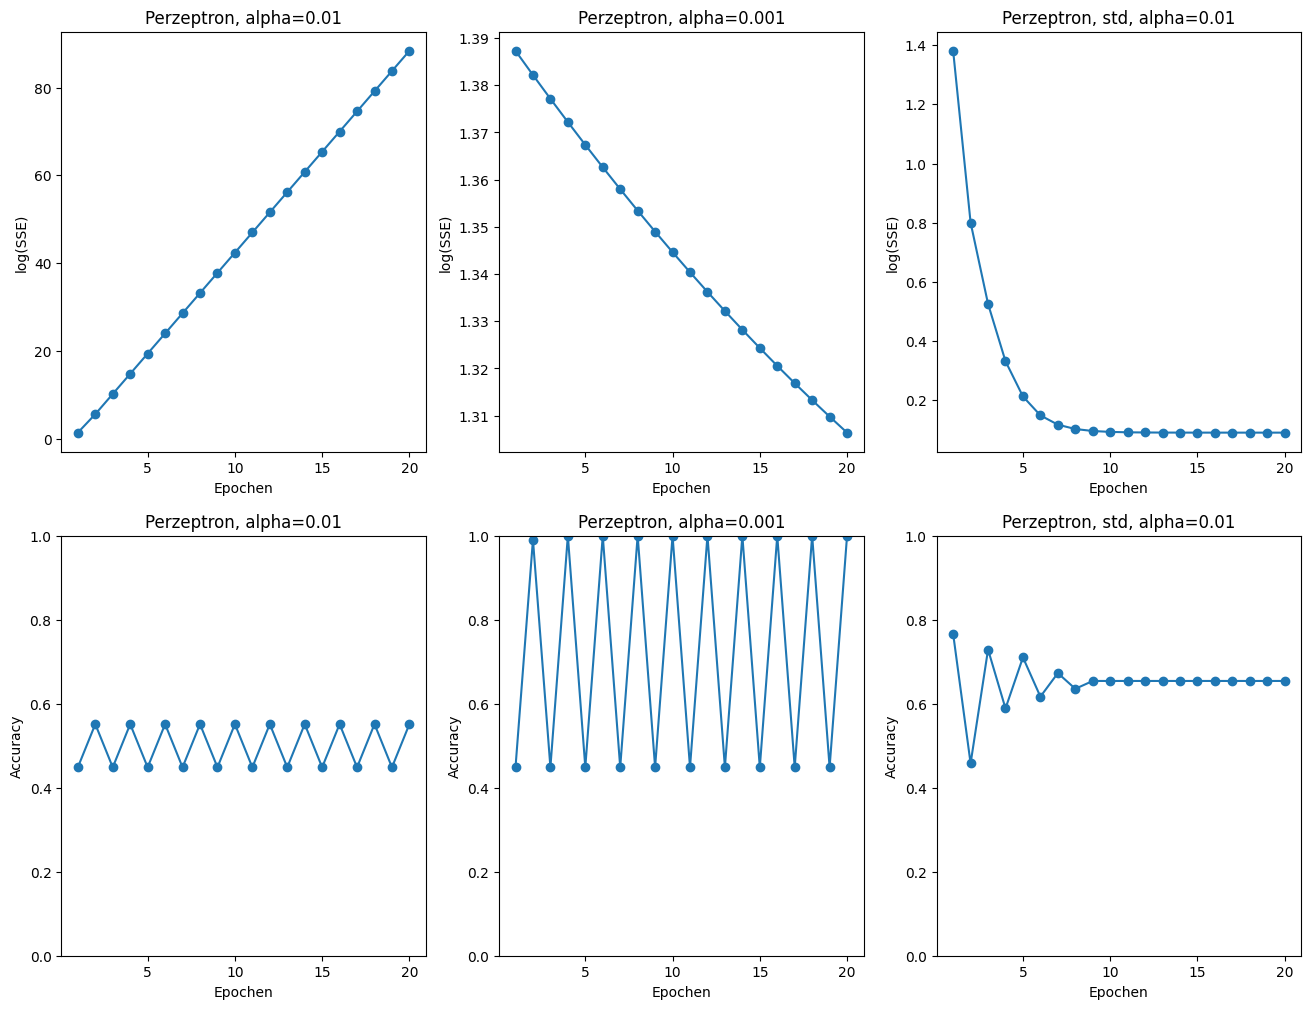

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,12))

ax[0][0].plot(range(1, len(model1.loss)+1), np.log10(model1.loss), marker='o')
ax[0][0].set_xlabel('Epochen')
ax[0][0].set_ylabel('log(SSE)')
ax[0][0].set_title('Perzeptron, alpha=0.01')

ax[0][1].plot(range(1, len(model2.loss)+1), np.log10(model2.loss), marker='o')
ax[0][1].set_xlabel('Epochen')
ax[0][1].set_ylabel('log(SSE)')
ax[0][1].set_title('Perzeptron, alpha=0.001')

ax[0][2].plot(range(1, len(model3.loss)+1), np.log10(model3.loss), marker='o')
ax[0][2].set_xlabel('Epochen')
ax[0][2].set_ylabel('log(SSE)')
ax[0][2].set_title('Perzeptron, std, alpha=0.01')

ax[1][0].plot(range(1, len(model1.loss)+1), model1.accuracy, marker='o')
ax[1][0].set_ylim(0, 1)
ax[1][0].set_xlabel('Epochen')
ax[1][0].set_ylabel('Accuracy')
ax[1][0].set_title('Perzeptron, alpha=0.01')

ax[1][1].plot(range(1, len(model2.loss)+1), model2.accuracy, marker='o')
ax[1][1].set_ylim(0, 1)
ax[1][1].set_xlabel('Epochen')
ax[1][1].set_ylabel('Accuracy')
ax[1][1].set_title('Perzeptron, alpha=0.001')

ax[1][2].plot(range(1, len(model3.loss)+1), model3.accuracy, marker='o')
ax[1][2].set_ylim(0, 1)
ax[1][2].set_xlabel('Epochen')
ax[1][2].set_ylabel('Accuracy')
ax[1][2].set_title('Perzeptron, std, alpha=0.01')

plt.show()